In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  
data = pd.read_csv('./gist-mldl24f-hw3/train.csv')

In [ ]:
#1.1 전체적인 데이터 분석
print(data.isnull().sum())


id            0
date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
class         0
price         0
dtype: int64


In [ ]:
data.dtypes

id            object
date          object
airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
class         object
price          int64
dtype: object

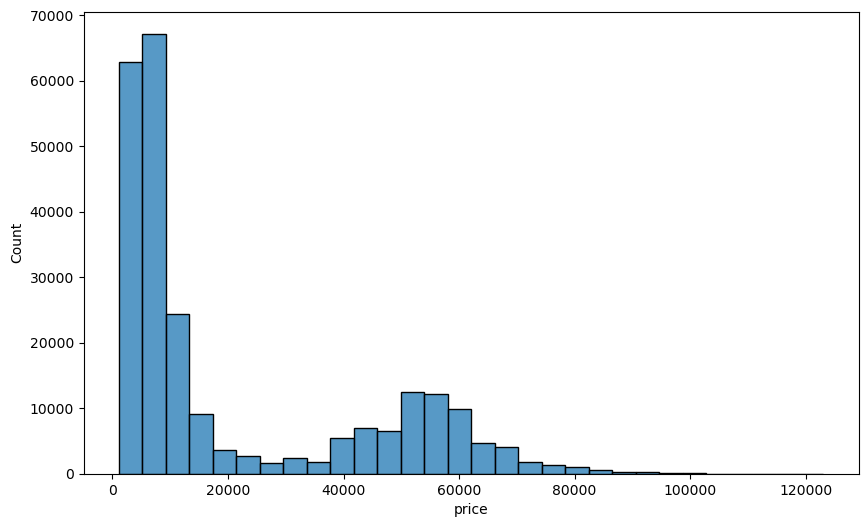

In [ ]:
#1.1.1 price

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30)  # 예: Price 열의 히스토그램
plt.show()


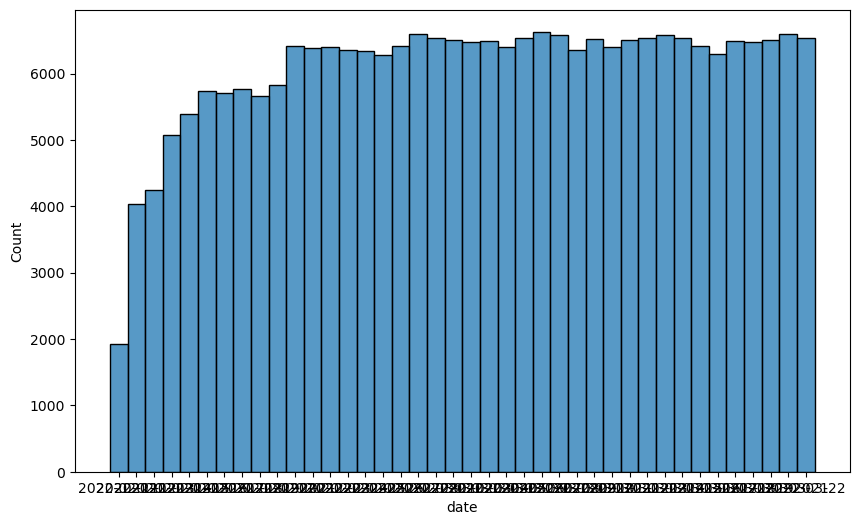

In [ ]:
#1.1.2
plt.figure(figsize=(10, 6))
sns.histplot(data['date']) 
plt.show()


In [ ]:
#범주형 데이터 -> 숫자 데이터로 변환
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in ['airline', 'ch_code', 'from', 'to', 'class', 'stop', 'id', 'date', 'dep_time', 'time_taken', 'arr_time']:
    data[column] = le.fit_transform(data[column])

In [ ]:
correlations = data.corr()['price'].sort_values(ascending=False)
correlations

price         1.000000
ch_code       0.306616
airline       0.240492
time_taken    0.204944
arr_time      0.068800
dep_time      0.034089
from          0.004959
to            0.004097
id           -0.002291
date         -0.100158
stop         -0.199639
num_code     -0.215896
class        -0.935449
Name: price, dtype: float64

1. 전체적인 데이터 분석
전체적으로 데이터의 결측치나 오류는 없는 것으로 확인했다. 각 변수는 
id            object -> 상관 없는 값일 듯
date          object
airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
class         object
price          int64
의 데이터 타입을 가지는 것으로 파악되었다. 

### distriution 파악

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


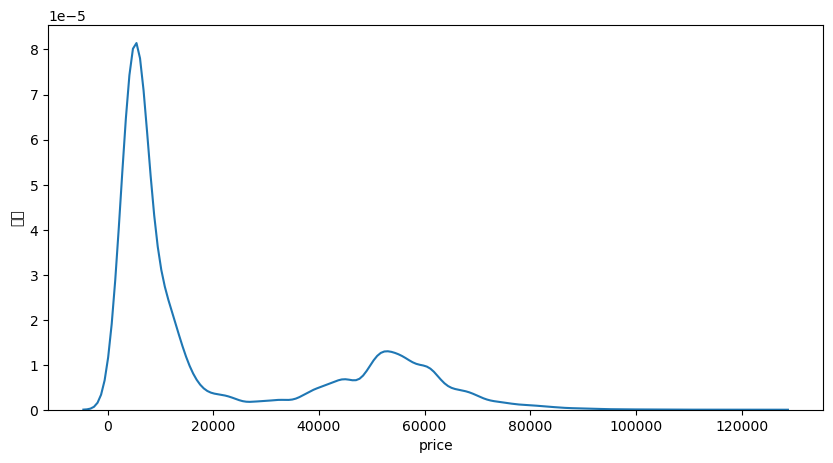

In [43]:
# kdeplot
# 빈 캔버스 사이즈 지정
plt.figure(figsize=(10,5))

# 캔버스에 그림 그리기
kde=sns.kdeplot(data['price']) 
kde.set_xlabel("price")
kde.set_ylabel("비율")

# 다 그려진 캔버스 보여주기
plt.show()

정규 분포 형태를 가지지 않는다. 100000대, 500000 대에 데이터가 몰려있으며, 특히 10000~20000 사이 데이터가 가장 많고 뾰족한 형태를 보인다. 

## 범주형 변수 파악

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


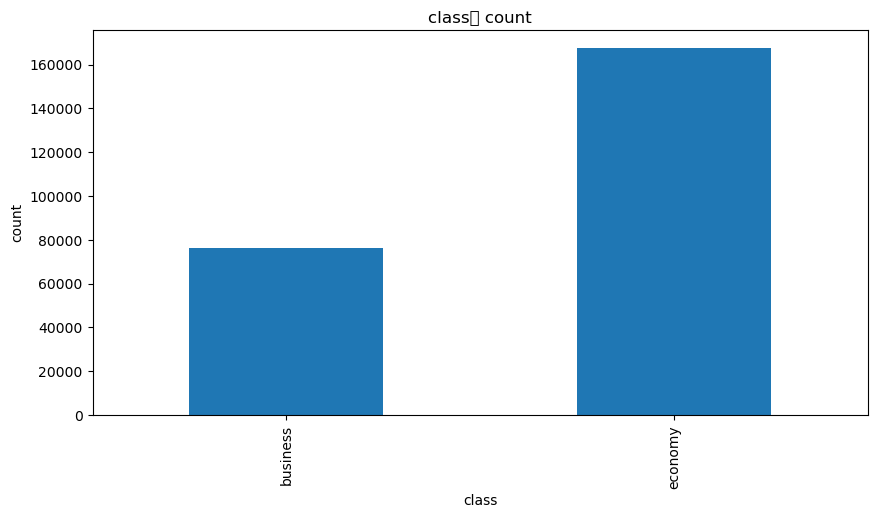

In [48]:
plt.figure(figsize=(10,5))# 있어도 되고 없어도 되는 코드, 다만 캔버스를 준비한다는 의미
data['class'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('class')
plt.ylabel('count')
plt.title('class별 count')
plt.show() # 캔버스를 보여준다

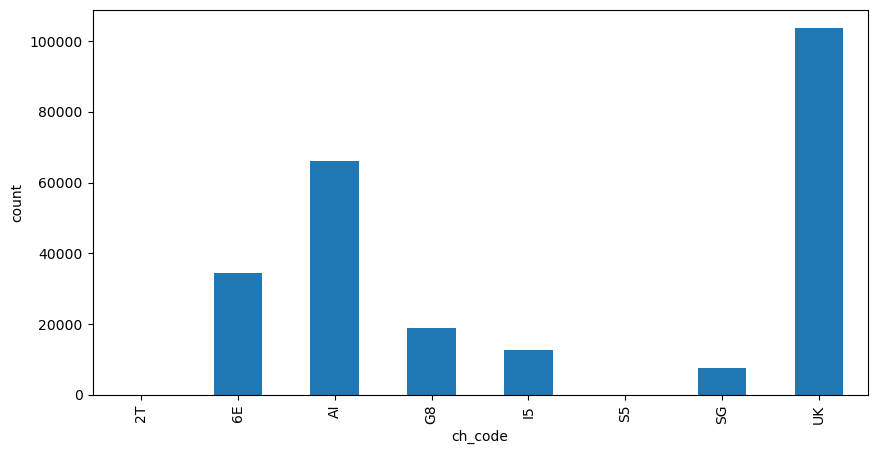

In [50]:
plt.figure(figsize=(10,5))# 있어도 되고 없어도 되는 코드, 다만 캔버스를 준비한다는 의미
data['ch_code'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('ch_code')
plt.ylabel('count')

plt.show() # 캔버스를 보여준다

class제외 다른 단일 변수들은 많은 상관관계를 가지고 있지 않은 것으로 파악된다. 그외 특별한 이상치는 없는것 같고 추가 분석이 이루어져야 할 것 같다. 범주형 데이터들이 많았고, price가 특정 값에만 몰려있었다. 

plt.figure(figsize=(10,5))# 있어도 되고 없어도 되는 코드, 다만 캔버스를 준비한다는 의미
data['ch_code'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('ch_code')
plt.ylabel('count')

plt.show() # 캔버스를 보여준다

# 2. implement simple baseline model

In [56]:
from matplotlib.pyplot import subplots
import sklearn.model_selection as sk
from ISLP.models import ModelSpec as MS
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART
import sklearn.model_selection as skm

In [55]:
model = MS(data.columns.drop('price'), intercept=False)
D = model.fit_transform(data)
feature_names=(D.columns)
X = np.asarray(D)

In [59]:
(X_train,
X_test ,
y_train ,
y_test) = skm.train_test_split(X,
data['price'], test_size=0.3, random_state=0)

In [60]:
reg = DTR(max_depth=3)
reg.fit(X_train, y_train)
ax = subplots(figsize=(12,12))[1]
plot_tree(reg, feature_names=feature_names, ax=ax)

ValueError: could not convert string to float: 'CR21N2'